#Importing libraries

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt # This library is used for data visualization
import seaborn as sns; sns.set() # This library is used for data visualization
import numpy as np # This library is used for Mathematical Computations

##Now we create blobs to represent the address location of the customers in order to predict the best possible location for our store. Importing make_blobs from sklearn sample generator. This library is used to generate random blobs as our data set for K Means Clustering Implementation

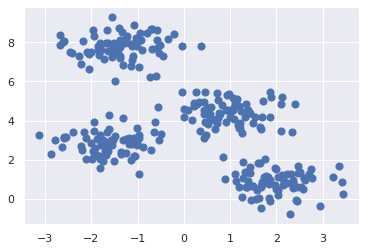

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 300, centers = 4,
                       cluster_std = 0.60, random_state = 0)
plt.scatter(X[:,0], X[:,1], s = 50);

##Importing KMeans and training it using our randomly generated data

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

##Here we define a function called find_clusters to group our data in 4 clusters. "4" because we specified the number of clusters during our KMeans Model initialisation. Afterwards we plot our KMeans Cluster output on our data.

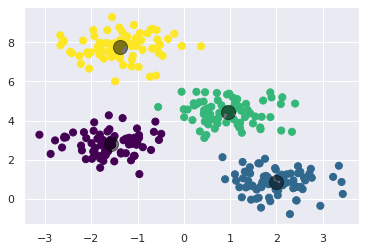

In [0]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed =2):
  # 1. Randomly choose clusters
  rng = np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters]
  centers = X[i]

  while True:
    # 2a. Assign labels based on closest center
    labels = pairwise_distances_argmin(X, centers)

    #2b. Find new centers from means of points
    new_centers = np.array([X[ labels == i].mean(0)
                           for i in range(n_clusters)])
    
    #2c. Check for convergence
    if np.all(centers == new_centers):
      break
    centers = new_centers
  return centers, labels

centers,labels = find_clusters(X,4)
plt.scatter(X[:,0], X[:,1], c = y_kmeans, s = 50, cmap = 'viridis') 

plt.scatter(centers[:,0], centers[:,1], c = 'black', s = 200, alpha = 0.5);